<h1><center>Introductory Data Analysis Workflow</center></h1>


![Pipeline](https://imgs.xkcd.com/comics/data_pipeline.png)
https://xkcd.com/2054

# An example machine learning notebook

*  Original Notebook by [Randal S. Olson](http://www.randalolson.com/)
*  Supported by [Jason H. Moore](http://www.epistasis.org/)
*  [University of Pennsylvania Institute for Bioinformatics](http://upibi.org/)
*  Adapted for LU Py-Sem 2018 by [Valdis Saulespurens](valdis.s.coding@gmail.com)

**You can also [execute the code in this notebook on Binder](https://mybinder.org/v2/gh/ValRCS/RigaComm_DataAnalysis/master) - no local installation required.**

In [1]:
# text 17.04.2019
import datetime
print(datetime.datetime.now())
print('hello')

2020-02-08 00:17:36.973224
hello


## Table of contents

1. [Introduction](#Introduction)

2. [License](#License)

3. [Required libraries](#Required-libraries)

4. [The problem domain](#The-problem-domain)

5. [Step 1: Answering the question](#Step-1:-Answering-the-question)

6. [Step 2: Checking the data](#Step-2:-Checking-the-data)

7. [Step 3: Tidying the data](#Step-3:-Tidying-the-data)

    - [Bonus: Testing our data](#Bonus:-Testing-our-data)

8. [Step 4: Exploratory analysis](#Step-4:-Exploratory-analysis)

9. [Step 5: Classification](#Step-5:-Classification)

    - [Cross-validation](#Cross-validation)

    - [Parameter tuning](#Parameter-tuning)

10. [Step 6: Reproducibility](#Step-6:-Reproducibility)

11. [Conclusions](#Conclusions)

12. [Further reading](#Further-reading)

13. [Acknowledgements](#Acknowledgements)

## Introduction

[[ go back to the top ]](#Table-of-contents)

In the time it took you to read this sentence, terabytes of data have been collectively generated across the world — more data than any of us could ever hope to process, much less make sense of, on the machines we're using to read this notebook.

In response to this massive influx of data, the field of Data Science has come to the forefront in the past decade. Cobbled together by people from a diverse array of fields — statistics, physics, computer science, design, and many more — the field of Data Science represents our collective desire to understand and harness the abundance of data around us to build a better world.

In this notebook, I'm going to go over a basic Python data analysis pipeline from start to finish to show you what a typical data science workflow looks like.

In addition to providing code examples, I also hope to imbue in you a sense of good practices so you can be a more effective — and more collaborative — data scientist.

I will be following along with the data analysis checklist from [The Elements of Data Analytic Style](https://leanpub.com/datastyle), which I strongly recommend reading as a free and quick guidebook to performing outstanding data analysis.

**This notebook is intended to be a public resource. As such, if you see any glaring inaccuracies or if a critical topic is missing, please feel free to point it out or (preferably) submit a pull request to improve the notebook.**

## License

[[ go back to the top ]](#Table-of-contents)

Please see the [repository README file](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects#license) for the licenses and usage terms for the instructional material and code in this notebook. In general, I have licensed this material so that it is as widely usable and shareable as possible.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

**Note:** I will not be providing support for people trying to run this notebook outside of the Anaconda Python distribution.

## The problem domain

[[ go back to the top ]](#Table-of-contents)

For the purposes of this exercise, let's pretend we're working for a startup that just got funded to create a smartphone app that automatically identifies species of flowers from pictures taken on the smartphone. We're working with a moderately-sized team of data scientists and will be building part of the data analysis pipeline for this app.

We've been tasked by our company's Head of Data Science to create a demo machine learning model that takes four measurements from the flowers (sepal length, sepal width, petal length, and petal width) and identifies the species based on those measurements alone.

<img src="img/petal_sepal.jpg" />

We've been given a [data set](https://github.com/ValRCS/RCS_Data_Analysis_Python/blob/master/data/iris-data.csv) from our field researchers to develop the demo, which only includes measurements for three types of *Iris* flowers:

### *Iris setosa*

<img src="img/iris_setosa.jpg" />

### *Iris versicolor*
<img src="img/iris_versicolor.jpg" />

### *Iris virginica*
<img src="img/iris_virginica.jpg" />

The four measurements we're using currently come from hand-measurements by the field researchers, but they will be automatically measured by an image processing model in the future.

**Note:** The data set we're working with is the famous [*Iris* data set](https://archive.ics.uci.edu/ml/datasets/Iris) — included with this notebook — which I have modified slightly for demonstration purposes.

## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to classify the species (i.e., class) of the flower based on four measurements that we're provided: sepal length, sepal width, petal length, and petal width.

Petal - ziedlapiņa, sepal - arī ziedlapiņa

![Petal vs Sepal](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/293px-Petal-sepal.jpg)

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly classified flowers — to quantify how well our model is performing. Our company's Head of Data has told us that we should achieve at least 90% accuracy.

>Did you understand the context for the question and the scientific or business application?

We're building part of a data analysis pipeline for a smartphone app that will be able to classify the species of flowers from pictures taken on the smartphone. In the future, this pipeline will be connected to another pipeline that automatically measures from pictures the traits we're using to perform this classification.

>Did you record the experimental design?

Our company's Head of Data has told us that the field researchers are hand-measuring 50 randomly-sampled flowers of each species using a standardized methodology. The field researchers take pictures of each flower they sample from pre-defined angles so the measurements and species can be confirmed by the other field researchers at a later point. At the end of each day, the data is compiled and stored on a private company GitHub repository.

>Did you consider whether the question could be answered with the available data?

The data set we currently have is only for three types of *Iris* flowers. The model built off of this data set will only work for those *Iris* flowers, so we will need more data to create a general flower classifier.

<hr />

Notice that we've spent a fair amount of time working on the problem without writing a line of code or even looking at the data.

**Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked.** Don't skip it.

## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [2]:
import pandas as pd

In [4]:

iris_data = pd.read_csv('../data/iris-data.csv')


In [5]:
#lets take a look at the first 5 rows
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Resources for loading data from nonlocal sources
# Pandas Can generally handle most common formats
# https://pandas.pydata.org/pandas-docs/stable/io.html

# SQL https://stackoverflow.com/questions/39149243/how-do-i-connect-to-a-sql-server-database-with-python
# NoSQL MongoDB https://realpython.com/introduction-to-mongodb-and-python/
# Apache Hadoop: https://dzone.com/articles/how-to-get-hadoop-data-into-a-python-model
# Apache Spark: https://www.datacamp.com/community/tutorials/apache-spark-python
# Data Scraping / Crawling libraries : https://elitedatascience.com/python-web-scraping-libraries Big Topic in itself

# Most data resources have some form of Python API / Library 

In [6]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We're in luck! The data seems to be in a usable format.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents. The headers even give us the units that the measurements were recorded in, just in case we needed to know at a later point in the project.

Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.

**One of the first things we should look for is missing data.** Thankfully, the field researchers already told us that they put a 'NA' into the spreadsheet when they were missing a measurement.

We can tell pandas to automatically identify missing values if it knows our missing value marker.

In [7]:
iris_data.shape

(150, 5)

In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# with na_values we can pass what cells to mark as na
iris_data = pd.read_csv('../data/iris-data.csv', na_values=['NA', 'N/A'])

Voilà! Now pandas knows to treat rows with 'NA' as missing values.

Next, it's always a good idea to look at the distribution of our data — especially the outliers.

Let's start by printing out some summary statistics about the data set.

In [11]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see several useful values from this table. For example, we see that five `petal_width_cm` entries are missing.

If you ask me, though, tables like this are rarely useful unless we know that our data should fall in a particular range. It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

Since we know we're going to be plotting in this section, let's set up the notebook so we can plot inside of it.

In [13]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

Next, let's create a **scatterplot matrix**. Scatterplot matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

We can even have the plotting package color each entry by its class to look for trends within the classes.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


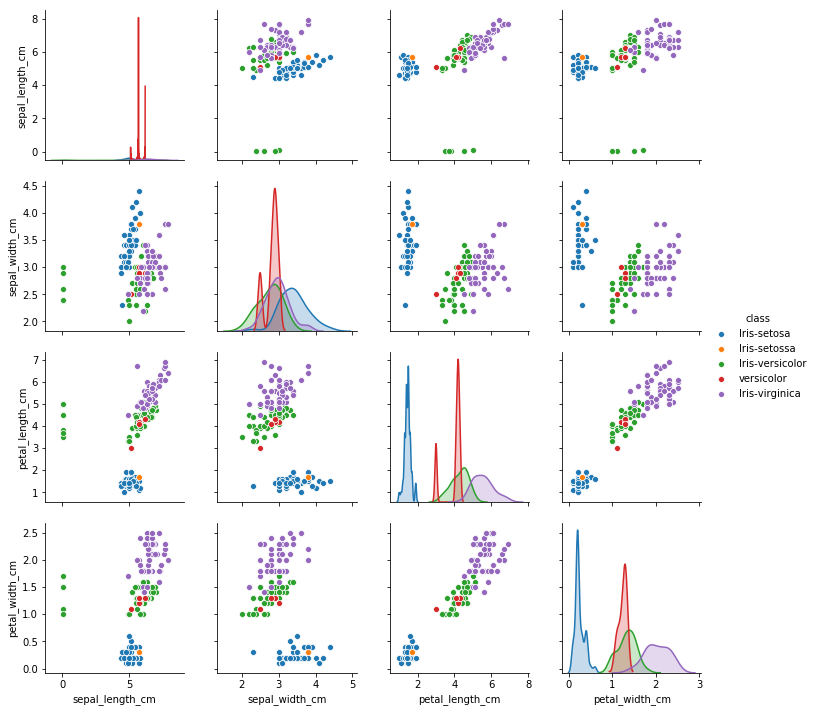

In [14]:
sb.pairplot(iris_data, hue='class')

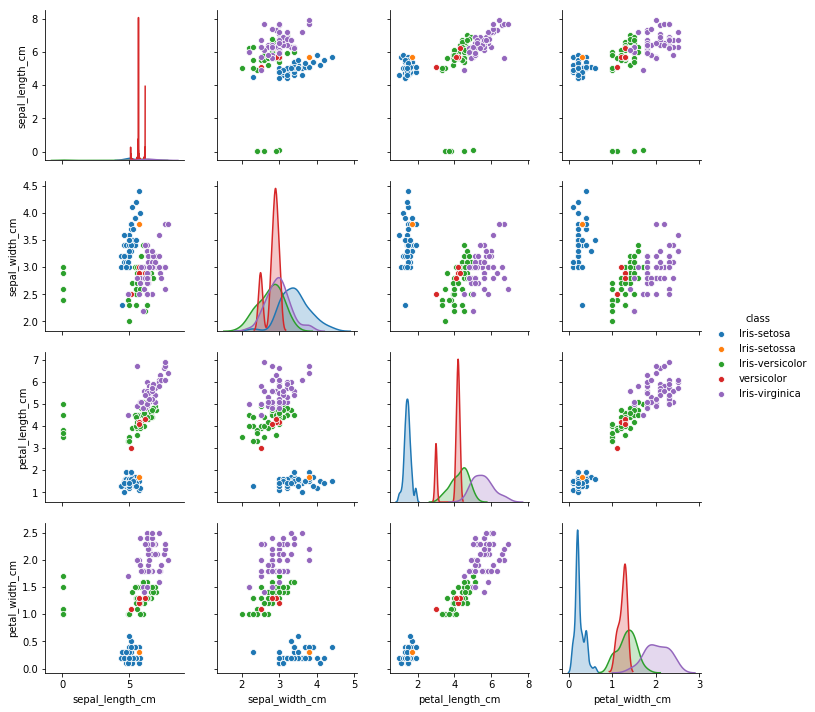

In [15]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sb.pairplot(iris_data.dropna(), hue='class')


From the scatterplot matrix, we can already see some issues with the data set:

1. There are five classes when there should only be three, meaning there were some coding errors.

2. There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

3. We had to drop those rows with missing values.

In all of these cases, we need to figure out what to do with the erroneous data. Which takes us to the next step...

## Step 3: Tidying the data

### GIGO principle

[[ go back to the top ]](#Table-of-contents)

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

Let's walk through the issues one-by-one.

>There are five classes when there should only be three, meaning there were some coding errors.

After talking with the field researchers, it sounds like one of them forgot to add `Iris-` before their `Iris-versicolor` entries. The other extraneous class, `Iris-setossa`, was simply a typo that they forgot to fix.

Let's use the DataFrame to fix these errors.

In [16]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [17]:
len(iris_data['class'].unique())

5

In [18]:
# Copy and Replace
# in df.loc[rows, thencolumns]
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data['class'].unique()


array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [19]:
# So we take a row where a specific column('class' here) matches our bad values 
# and change them to good values

iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
iris_data.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
iris_data[98:103]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica


In [19]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Much better! Now we only have three class types. Imagine how embarrassing it would've been to create a model that used the wrong classes.

>There are some clear outliers in the measurements that may be erroneous: one `sepal_width_cm` entry for `Iris-setosa` falls well outside its normal range, and several `sepal_length_cm` entries for `Iris-versicolor` are near-zero for some reason.

Fixing outliers can be tricky business. It's rarely clear whether the outlier was caused by measurement error, recording the data in improper units, or if the outlier is a real anomaly. For that reason, we should be judicious when working with outliers: if we decide to exclude any data, we need to make sure to document what data we excluded and provide solid reasoning for excluding that data. (i.e., "This data didn't fit my hypothesis" will not stand peer review.)

In the case of the one anomalous entry for `Iris-setosa`, let's say our field researchers know that it's impossible for `Iris-setosa` to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.

In [22]:
# here we see all flowers with sepal_width_cm under 2.5m
iris_data.loc[(iris_data['sepal_width_cm'] < 2.5)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.500,2.3,1.3,0.3,Iris-setosa
53,5.500,2.3,4.0,1.3,Iris-versicolor
57,4.900,2.4,3.3,1.0,Iris-versicolor
60,5.000,2.0,3.5,1.0,Iris-versicolor
62,6.000,2.2,4.0,1.0,Iris-versicolor
68,6.200,2.2,4.5,1.5,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor
87,6.300,2.3,4.4,1.3,Iris-versicolor
93,5.000,2.3,3.3,1.0,Iris-versicolor


In [25]:
## for multiple filters we use & for AND , and use | for OR 
smallpetals = iris_data.loc[(iris_data['sepal_width_cm'] < 2.5) & (iris_data['class'] == 'Iris-setosa')]
smallpetals

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.5,2.3,1.3,0.3,Iris-setosa


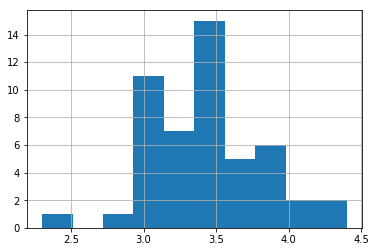

In [26]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [27]:
len(iris_data)

150

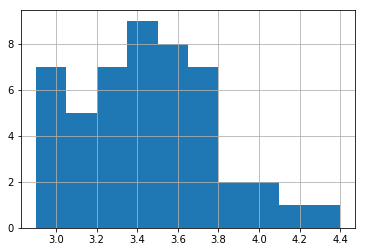

In [28]:
# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
# Let's go over this command in class

iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()


In [29]:
len(iris_data)

149

Excellent! Now all of our `Iris-setosa` rows have a sepal width greater than 2.5.

The next data issue to address is the several near-zero sepal lengths for the `Iris-versicolor` rows. Let's take a look at those rows.

In [30]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


How about that? All of these near-zero `sepal_length_cm` entries seem to be off by two orders of magnitude, as if they had been recorded in meters instead of centimeters.

After some brief correspondence with the field researchers, we find that one of them forgot to convert those measurements to centimeters. Let's do that for them.

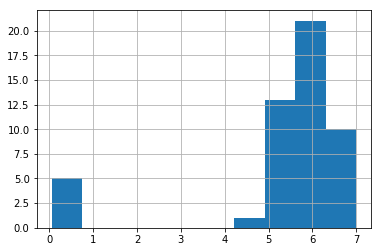

In [31]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

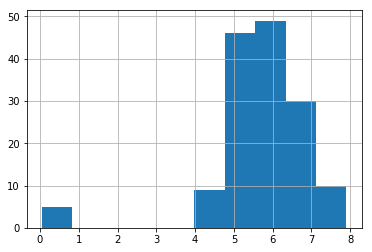

In [30]:
iris_data['sepal_length_cm'].hist()

In [32]:
# we double check before changing anyting if our filter works
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)].head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [33]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


''

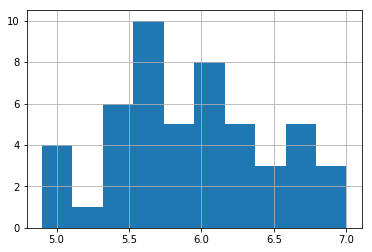

In [34]:
# Here we fix the wrong units

iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
;

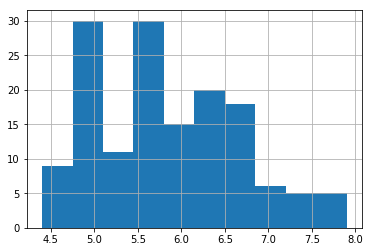

In [35]:
iris_data['sepal_length_cm'].hist()

Phew! Good thing we fixed those outliers. They could've really thrown our analysis off.

>We had to drop those rows with missing values.

Let's take a look at the rows with missing values:

In [38]:
iris_data.notnull()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True
7,True,True,True,False,True
8,True,True,True,False,True
9,True,True,True,False,True


In [39]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


It's not ideal that we had to drop those rows, especially considering they're all `Iris-setosa` entries. Since it seems like the missing data is systematic — all of the missing values are in the same column for the same *Iris* type — this error could potentially bias our analysis.

One way to deal with missing data is **mean imputation**: If we know that the values for a measurement fall in a certain range, we can fill in empty values with the average of that measurement.

Let's see if we can do that here.

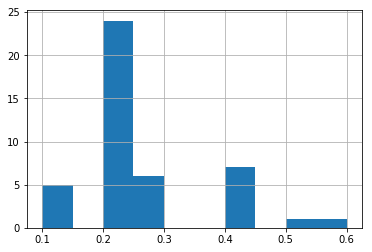

In [40]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()


Most of the petal widths for `Iris-setosa` fall within the 0.2-0.3 range, so let's fill in these entries with the average measured petal width.

In [41]:
iris_setosa_avg = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
iris_setosa_avg

0.24999999999999997

In [43]:
type(iris_setosa_avg)

float

In [51]:
round(iris_setosa_avg, 2)

0.25

In [52]:
# for our purposes 4 digita accuracy is sufficient, add why here :)
iris_setosa_avg = round(iris_setosa_avg, 4)

In [38]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
print(average_petal_width)

0.24999999999999997


In [54]:
average_petal_width = iris_setosa_avg

In [55]:
# we find iris-setosa rows where petal_width_cm is missing

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:

# we find all iris-setosa with the average
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [57]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [58]:
# if we want to drop rows with missing data
# and save them into a new dataframe
dfwithoutmissingvalues = iris_data.dropna()
len(dfwithoutmissingvalues)

149

Great! Now we've recovered those rows and no longer have missing data in our data set.

**Note:** If you don't feel comfortable imputing your data, you can drop all rows with missing data with the `dropna()` call:

    iris_data.dropna(inplace=True)

After all this hard work, we don't want to repeat this process every time we work with the data set. Let's save the tidied data file *as a separate file* and work directly with that data file from now on.

In [59]:
import json

In [60]:
iris_data.to_json('../data/iris-clean.json')

In [62]:
# to bypass pandas missing json formatter we can format the data ourselves
df_json_pretty = json.dumps(json.loads(iris_data.to_json()), indent=4)
type(df_json_pretty)

str

In [45]:
df_json_pretty[:100]

'{\n    "sepal_length_cm": {\n        "0": 5.1,\n        "1": 4.9,\n        "2": 4.7,\n        "3": 4.6,\n '

In [63]:
with open('data.json', 'w', encoding='utf-8') as f:
    f.write(df_json_pretty)

In [66]:
iris_data.to_csv('../data/iris-data-clean.csv', index=False)



In [67]:
# for saving in the same folder
iris_data.to_csv('iris-data-clean.csv', index=False)

In [68]:
iris_data_clean = pd.read_csv('../data/iris-data-clean.csv')

Now, let's take a look at the scatterplot matrix now that we've tidied the data.

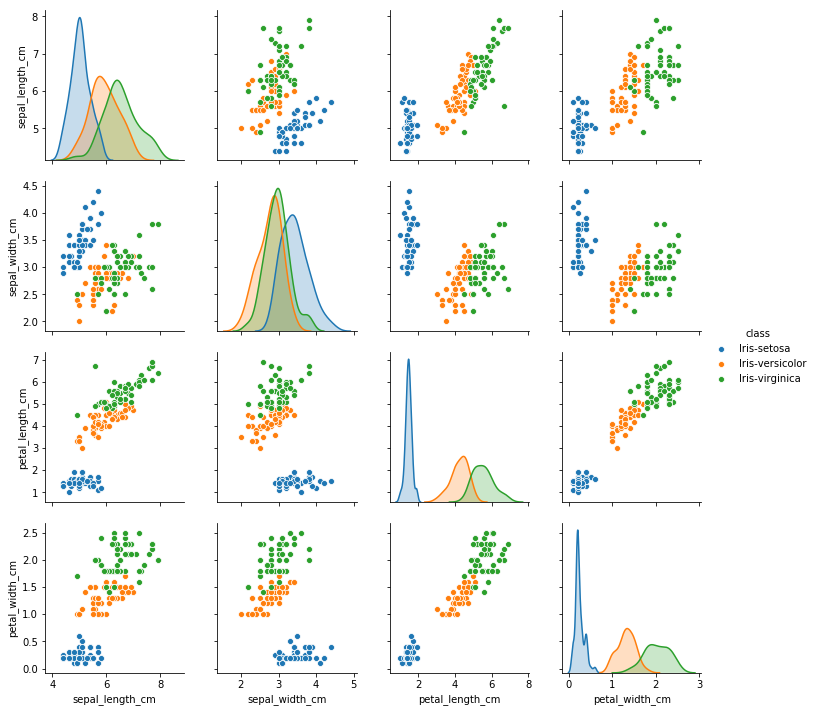

In [69]:
myplot = sb.pairplot(iris_data_clean, hue='class')
myplot.savefig('irises.png')

In [70]:
import scipy.stats as stats

In [71]:
iris_data = pd.read_csv('../data/iris-data.csv')

In [72]:
iris_data.columns.unique()

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [73]:
stats.entropy(iris_data_clean['sepal_length_cm'])

4.9947332367061925

In [49]:
iris_data.columns[:-1]

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm'],
      dtype='object')

In [54]:
# we go through list of column names except last one and get entropy 
# for data (without missing values) in each column
for col in iris_data.columns[:-1]:
    print("Entropy for: ", col, stats.entropy(iris_data[col].dropna()))

Entropy for:  sepal_length_cm 4.96909746125432
Entropy for:  sepal_width_cm 5.000701325982732
Entropy for:  petal_length_cm 4.888113822938816
Entropy for:  petal_width_cm 4.754264731532864


Of course, I purposely inserted numerous errors into this data set to demonstrate some of the many possible scenarios you may face while tidying your data.

The general takeaways here should be:

* Make sure your data is encoded properly

* Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range

* Deal with missing data in one way or another: replace it if you can or drop it

* Never tidy your data manually because that is not easily reproducible

* Use code as a record of how you tidied your data

* Plot everything you can about the data at this stage of the analysis so you can *visually* confirm everything looks correct

## Bonus: Testing our data

[[ go back to the top ]](#Table-of-contents)

At SciPy 2015, I was exposed to a great idea: We should test our data. Just how we use unit tests to verify our expectations from code, we can similarly set up unit tests to verify our expectations about a data set.

We can quickly test our data using `assert` statements: We assert that something must be true, and if it is, then nothing happens and the notebook continues running. However, if our assertion is wrong, then the notebook stops running and brings it to our attention. For example,

```Python
assert 1 == 2
```

will raise an `AssertionError` and stop execution of the notebook because the assertion failed.

Let's test a few things that we know about our data set now.

In [74]:
assert 1 == 3

AssertionError: 

In [75]:
# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

In [76]:
assert len(iris_data['class'].unique()) == 3

AssertionError: 

In [ ]:
# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

In [77]:
# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

In [78]:
# We know that our data set should have no missing measurements
assert len(iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
                               (iris_data['sepal_width_cm'].isnull()) |
                               (iris_data['petal_length_cm'].isnull()) |
                               (iris_data['petal_width_cm'].isnull())]) == 0

AssertionError: 

And so on. If any of these expectations are violated, then our analysis immediately stops and we have to return to the tidying stage.

### Data Cleanup & Wrangling > 80% time spent in Data Science

## Step 4: Exploratory analysis

[[ go back to the top ]](#Table-of-contents)

Now after spending entirely too much time tidying our data, we can start analyzing it!

Exploratory analysis is the step where we start delving deeper into the data set beyond the outliers and errors. We'll be looking to answer questions such as:

* How is my data distributed?

* Are there any correlations in my data?

* Are there any confounding factors that explain these correlations?

This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use.

Let's return to that scatterplot matrix that we used earlier.

''

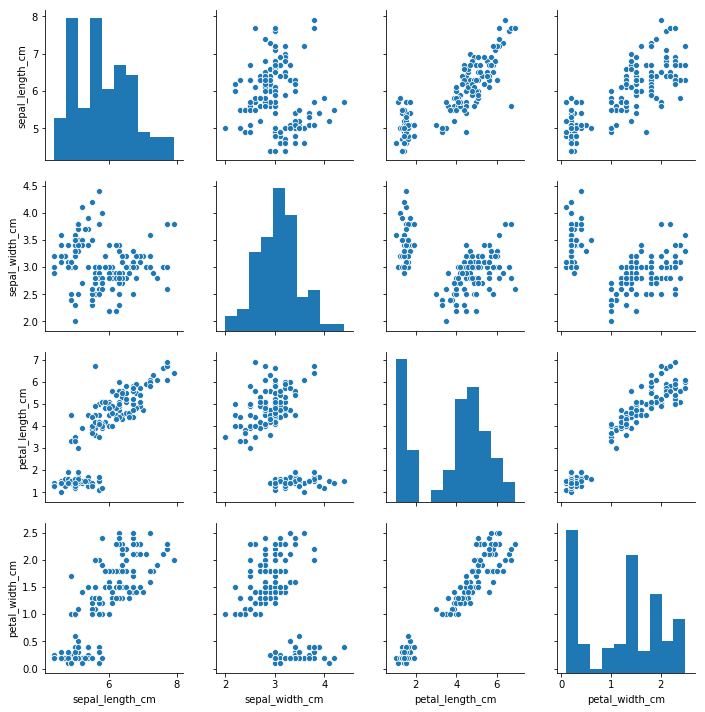

In [79]:
sb.pairplot(iris_data_clean)
;

Our data is normally distributed for the most part, which is great news if we plan on using any modeling methods that assume the data is normally distributed.

There's something strange going on with the petal measurements. Maybe it's something to do with the different `Iris` types. Let's color code the data by the class again to see if that clears things up.

''

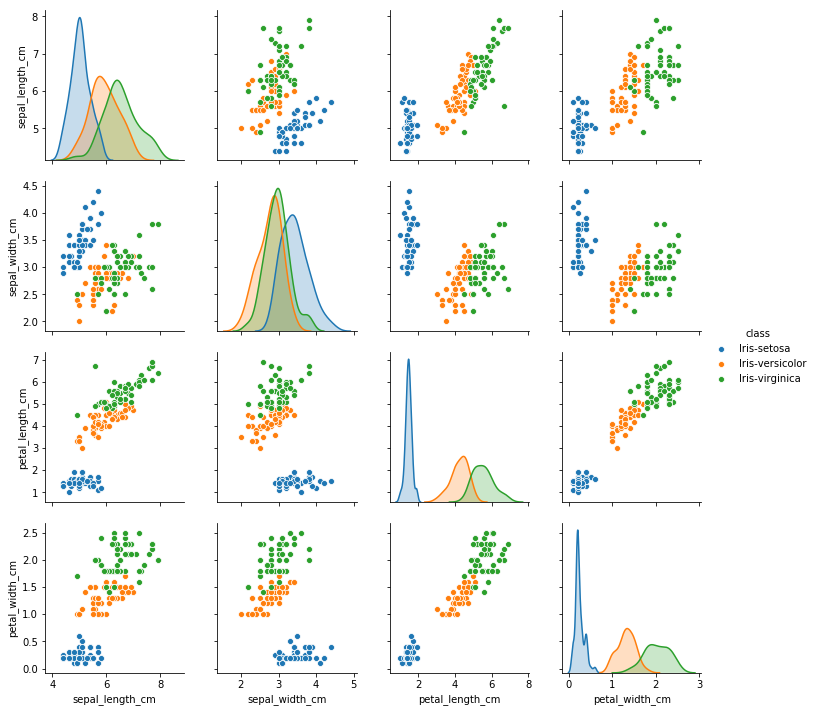

In [80]:
sb.pairplot(iris_data_clean, hue='class')
;

Sure enough, the strange distribution of the petal measurements exist because of the different species. This is actually great news for our classification task since it means that the petal measurements will make it easy to distinguish between `Iris-setosa` and the other `Iris` types.

Distinguishing `Iris-versicolor` and `Iris-virginica` will prove more difficult given how much their measurements overlap.

There are also correlations between petal length and petal width, as well as sepal length and sepal width. The field biologists assure us that this is to be expected: Longer flower petals also tend to be wider, and the same applies for sepals.

We can also make [**violin plots**](https://en.wikipedia.org/wiki/Violin_plot) of the data to compare the measurement distributions of the classes. Violin plots contain the same information as [box plots](https://en.wikipedia.org/wiki/Box_plot), but also scales the box according to the density of the data.

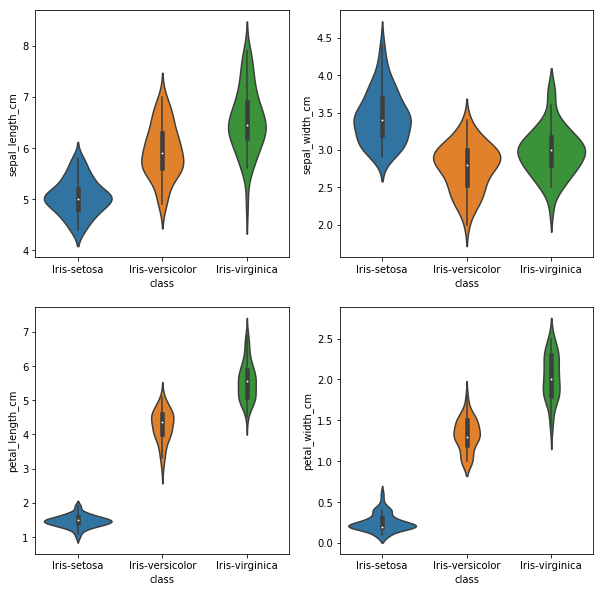

In [81]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

Enough flirting with the data. Let's get to modeling.

## Step 5: Classification

[[ go back to the top ]](#Table-of-contents)

Wow, all this work and we *still* haven't modeled the data!

As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model.

Remember: **Bad data leads to bad models.** Always check your data first.

<hr />

Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to make the next big step in our analysis: Splitting the data into training and testing sets.

A **training set** is a random subset of the data that we use to train our models.

A **testing set** is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Especially in sparse data sets like ours, it's easy for models to **overfit** the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating.

Let's set up our data first.

In [83]:
# iris_data_clean = pd.read_csv('../data/iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
# usually called X
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the class labels
# answers/label often called little y
all_labels = iris_data_clean['class'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [84]:
type(all_inputs)

numpy.ndarray

In [85]:
all_labels[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [86]:
type(all_labels)

numpy.ndarray

Now our data is ready to be split.

In [88]:
all_inputs[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [89]:
iris_data_clean.head(3)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [90]:
all_labels[:3]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [87]:
from sklearn.model_selection import train_test_split

In [93]:
# Here we split our data into training and testing data
# you can read more on split function at
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [91]:
len(all_inputs)

149

In [94]:
len(training_inputs)

111

In [95]:
0.75*149

111.75

In [96]:
149*0.25

37.25

In [97]:
len(testing_inputs)

38

In [98]:
training_inputs[:5]

array([[5.1, 3.5, 1.4, 0.3],
       [5.8, 2.8, 5.1, 2.4],
       [6.7, 3.3, 5.7, 2.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.8, 2.8, 4.8, 1.4]])

In [99]:
testing_inputs[:5]

array([[6.3, 2.5, 5. , 2.3],
       [5.5, 2.6, 4.4, 1.2],
       [5.7, 2.8, 4.5, 1.3],
       [6. , 2.9, 4.5, 1.5],
       [6. , 3.4, 4.5, 1.6]])

In [100]:
testing_classes[:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [101]:
training_classes[:5]

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

With our data split, we can start fitting models to our data. Our company's Head of Data is all about decision tree classifiers, so let's start with one of those.

Decision tree classifiers are incredibly simple in theory. In their simplest form, decision tree classifiers ask a series of Yes/No questions about the data — each time getting closer to finding out the class of each entry — until they either classify the data set perfectly or simply can't differentiate a set of entries. Think of it like a game of [Twenty Questions](https://en.wikipedia.org/wiki/Twenty_Questions), except the computer is *much*, *much* better at it.

Here's an example decision tree classifier:

<img src="img/iris_dtc.png" />

Notice how the classifier asks Yes/No questions about the data — whether a certain feature is <= 1.75, for example — so it can differentiate the records. This is the essence of every decision tree.

The nice part about decision tree classifiers is that they are **scale-invariant**, i.e., the scale of the features does not affect their performance, unlike many Machine Learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1,000; decision tree classifiers will work with them just the same.

There are several [parameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) that we can tune for decision tree classifiers, but for now let's use a basic decision tree classifier.

In [102]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

In [103]:
1-1/38

0.9736842105263158

In [104]:
decision_tree_classifier.score(training_inputs, training_classes)

1.0

In [105]:
150*0.25

37.5

In [106]:
len(testing_inputs)

38

In [107]:
# How the accuracy score came about 37 out of 38 correct
37/38

0.9736842105263158

In [108]:
# lets try a cooler model SVM - Support Vector Machines
from sklearn import svm
svm_classifier = svm.SVC(gamma = 'scale')

In [109]:
svm_classifier.fit(training_inputs, training_classes)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
svm_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

In [111]:
svm_classifier = svm.SVC(gamma = 'scale')
svm_classifier.fit(training_inputs, training_classes)
svm_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

Heck yeah! Our model achieves 97% classification accuracy without much effort.

However, there's a catch: Depending on how our training and testing set was sampled, our model can achieve anywhere from 80% to 100% accuracy:

In [112]:
import matplotlib.pyplot as plt

''

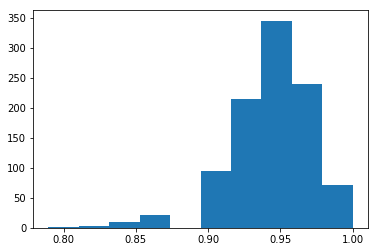

In [113]:
# here we randomly split data 1000 times in differrent training and test sets
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    # notice how we do not specify a seed so 1000 times we perform a random split
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

In [114]:
max(model_accuracies)

1.0

In [115]:
min(model_accuracies)

0.7894736842105263

In [116]:
1-7/38

0.8157894736842105

In [118]:
from collections import Counter

In [119]:
acc_count = Counter(model_accuracies)
acc_count

Counter({0.9473684210526315: 345,
         0.9210526315789473: 215,
         0.8947368421052632: 95,
         0.8421052631578947: 9,
         0.868421052631579: 21,
         0.9736842105263158: 239,
         1.0: 72,
         0.8157894736842105: 3,
         0.7894736842105263: 1})

In [84]:
1/38

0.02631578947368421

In [ ]:
100/38

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as **overfitting**: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.

### Cross-validation

[[ go back to the top ]](#Table-of-contents)

This problem is the main reason that most data scientists perform ***k*-fold cross-validation** on their models: Split the original data set into *k* subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated *k* times such that each subset is used as the testing set exactly once.

10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:

(each square is an entry in our data set)

In [120]:
iris_data_clean.head(15)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.20,Iris-setosa
1,4.9,3.0,1.4,0.20,Iris-setosa
2,4.7,3.2,1.3,0.20,Iris-setosa
3,4.6,3.1,1.5,0.20,Iris-setosa
4,5.0,3.6,1.4,0.20,Iris-setosa
5,5.4,3.9,1.7,0.40,Iris-setosa
6,4.6,3.4,1.4,0.30,Iris-setosa
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa


In [33]:
iris_data_clean.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,2.3,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# new text

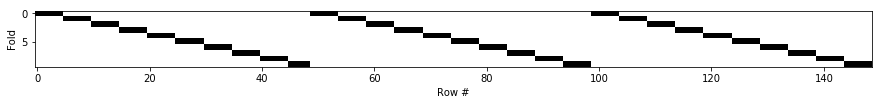

In [121]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

You'll notice that we used **Stratified *k*-fold cross-validation** in the code above. Stratified *k*-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% `Iris setosa` entries in one of the folds.)

We can perform 10-fold cross-validation on our model with the following code:

In [36]:
from sklearn.model_selection import cross_val_score

''

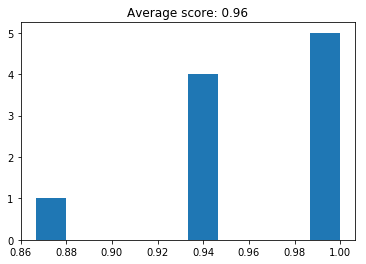

In [122]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [123]:
cv_scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [39]:
1-1/15

0.9333333333333333

In [40]:
len(all_inputs.T[1])

149

In [41]:
import scipy.stats as stats

In [45]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
# https://en.wikipedia.org/wiki/Entropy_(information_theory)
print("Entropy for: ",  stats.entropy(all_inputs.T[1]))

Entropy for:  4.994187360273029


In [46]:
# we go through list of column names except last one and get entropy 
# for data (without missing values) in each column
def printEntropy(npdata):
    for i, col in enumerate(npdata.T):
        print("Entropy for column:", i, stats.entropy(col))

In [47]:
printEntropy(all_inputs)

Entropy for column: 0 4.9947332367061925
Entropy for column: 1 4.994187360273029
Entropy for column: 2 4.88306851089088
Entropy for column: 3 4.76945055275522


Now we have a much more consistent rating of our classifier's general classification accuracy.

### Parameter tuning

[[ go back to the top ]](#Table-of-contents)

Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier:

''

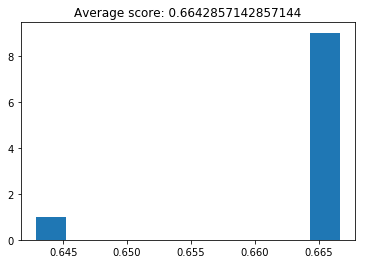

In [124]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

the classification accuracy falls tremendously.

Therefore, we need to find a systematic method to discover the best parameters for our model and data set.

The most common method for model parameter tuning is **Grid Search**. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

In [125]:
# prepare to grid and to fit
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

# the parameters will depend on the model we use above
parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)


grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

In [126]:


# here the grid search will loop through all parameter combinations and fit the model to cross validated splits
grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.959731543624161
Best parameters: {'max_depth': 3, 'max_features': 3}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Now let's visualize the grid search to see how the parameters interact.

In [127]:
type(grid_search)

sklearn.model_selection._search.GridSearchCV

In [128]:
grid_search.estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [129]:
grid_search.param_grid

{'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 2, 3, 4]}

In [130]:
type(grid_search.param_grid)

dict

In [131]:
grid_search.cv

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [52]:
grid_search.cv_results_['mean_test_score']

array([0.61744966, 0.65100671, 0.66442953, 0.66442953, 0.8590604 ,
       0.95302013, 0.95302013, 0.95302013, 0.84563758, 0.94630872,
       0.95973154, 0.95973154, 0.90604027, 0.94630872, 0.95973154,
       0.95302013, 0.89932886, 0.94630872, 0.95302013, 0.95973154])

In [133]:
cv_res = grid_search.cv_results_['mean_test_score']
cv_res.shape

(20,)

In [134]:
import seaborn as sb

''

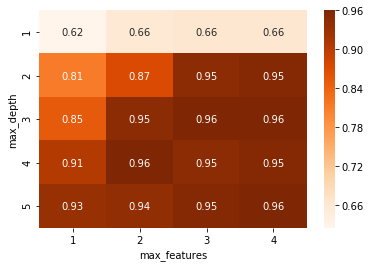

In [139]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Oranges', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.savefig("grid_heatmap.png")
;

In [138]:
plt.savefig("empty.jpg")

<Figure size 432x288 with 0 Axes>

Now we have a better sense of the parameter space: We know that we need a `max_depth` of at least 2 to allow the decision tree to make more than a one-off decision.

`max_features` doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember, one of our data set's classes was easily separable from the rest based on a single feature.)

Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [140]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9664429530201343
Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 3, 'splitter': 'best'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [142]:
149*grid_search.best_score_

144.0

In [143]:
143/149

0.959731543624161

In [144]:
145/149

0.9731543624161074

Now we can take the best classifier from the Grid Search and use that:

In [145]:
# we pick the best one and save for now in a different variable
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [146]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

<img src="img/iris_dtc.png" />

(This classifier may look familiar from earlier in the notebook.)

Alright! We finally have our demo classifier. Let's create some visuals of its performance so we have something to show our company's Head of Data.

In [147]:
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

''

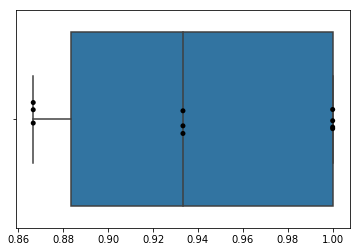

In [151]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')
;

Hmmm... that's a little boring by itself though. How about we compare another classifier to see how they perform?

We already know from previous projects that Random Forest classifiers usually work better than individual decision trees. A common problem that decision trees face is that they're prone to overfitting: They complexify to the point that they classify the training set near-perfectly, but fail to generalize to data they have not seen before.

**Random Forest classifiers** work around that limitation by creating a whole bunch of decision trees (hence "forest") — each trained on random subsets of training samples (drawn with replacement) and features (drawn without replacement) — and have the decision trees work together to make a more accurate classification.

Let that be a lesson for us: **Even in Machine Learning, we get better results when we work together!**

Let's see if a Random Forest classifier works better here.

The great part about scikit-learn is that the training, testing, parameter tuning, etc. process is the same for all models, so we only need to plug in the new classifier.

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9664429530201343
Best parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 50}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Now we can compare their performance:

In [154]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)
both_df.head()

,accuracy,classifier
0,1.000000,Random Forest
1,0.933333,Random Forest
2,1.000000,Random Forest
3,0.933333,Random Forest
4,0.866667,Random Forest


In [155]:
both_df

,accuracy,classifier
0,1.000000,Random Forest
1,0.933333,Random Forest
2,1.000000,Random Forest
3,0.933333,Random Forest
4,0.866667,Random Forest
5,0.933333,Random Forest
6,0.866667,Random Forest
7,1.000000,Random Forest
8,1.000000,Random Forest
9,1.000000,Random Forest


''

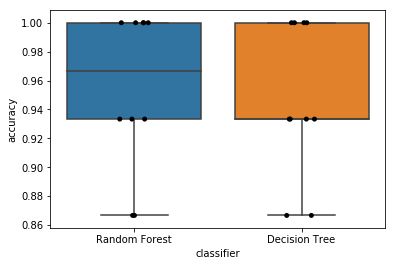

In [156]:


sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
;

How about that? They both seem to perform about the same on this data set. This is probably because of the limitations of our data set: We have only 4 features to make the classification, and Random Forest classifiers excel when there's hundreds of possible features to look at. In other words, there wasn't much room for improvement with this data set.

## Step 6: Reproducibility

[[ go back to the top ]](#Table-of-contents)

Ensuring that our work is reproducible is the last and — arguably — most important step in any analysis. **As a rule, we shouldn't place much weight on a discovery that can't be reproduced**. As such, if our analysis isn't reproducible, we might as well not have done it.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it — both in text and code.

Beyond recording what we did, we should also document what software and hardware we used to perform our analysis. This typically goes at the top of our notebooks so our readers know what tools to use.

[Sebastian Raschka](http://sebastianraschka.com/) created a handy [notebook tool](https://github.com/rasbt/watermark) for this:

In [157]:
!pip install watermark

In [158]:
%load_ext watermark

In [160]:
myversions = pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.3.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: 4.3.1
pip: 19.0.3
setuptools: 41.0.1
Cython: 0.29.6
numpy: 1.16.2
scipy: 1.2.1
pyarrow: None
xarray: None
IPython: 7.4.0
sphinx: 1.8.5
patsy: 0.5.1
dateutil: 2.8.0
pytz: 2018.9
blosc: None
bottleneck: 1.2.1
tables: 3.5.1
numexpr: 2.6.9
feather: None
matplotlib: 3.0.3
openpyxl: 2.6.1
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.5
lxml.etree: 4.3.2
bs4: 4.7.1
html5lib: 1.0.1
sqlalchemy: 1.3.1
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: 0.7.0
gcsfs: None


In [161]:
myversions

In [162]:
%watermark -a 'RCS_12' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

RCS_12 Sat Dec 14 2019 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
pandas 0.24.2
sklearn 0.20.3
matplotlib 3.0.3
seaborn 0.9.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores  : 12
interpreter: 64bit


Finally, let's extract the core of our work from Steps 1-5 and turn it into a single pipeline.

[6.1 2.6 5.6 1.4]	-->	Iris-versicolor	(Actual: Iris-virginica)
[6.3 2.7 4.9 1.8]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.3 3.3 6.  2.5]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.2 3.4 1.4 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.1 3.5 1.4 0.3]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.9 3.2 4.8 1.8]	-->	Iris-virginica	(Actual: Iris-versicolor)
[5.4 3.9 1.7 0.4]	-->	Iris-setosa	(Actual: Iris-setosa)
[6.9 3.1 4.9 1.5]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.1 2.9 4.7 1.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[5.8 2.8 5.1 2.4]	-->	Iris-virginica	(Actual: Iris-virginica)


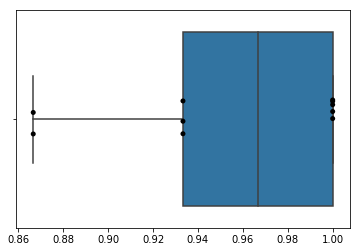

In [163]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('../data/iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

# get inputs and labels in NumPY (out of Pandas dataframe)
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_labels = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=3, n_estimators=50)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='black')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

In [110]:
len(testing_inputs)

38

In [164]:
for input_features, prediction, actual in zip(testing_inputs,
                                              random_forest_classifier.predict(testing_inputs),
                                              testing_classes):
    if (prediction == actual):
        print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))
    else:
        print('!!!!!MISMATCH***{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

!!!!!MISMATCH***[6.1 2.6 5.6 1.4]	-->	Iris-versicolor	(Actual: Iris-virginica)
[6.3 2.7 4.9 1.8]	-->	Iris-virginica	(Actual: Iris-virginica)
[6.3 3.3 6.  2.5]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.2 3.4 1.4 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.1 3.5 1.4 0.3]	-->	Iris-setosa	(Actual: Iris-setosa)
!!!!!MISMATCH***[5.9 3.2 4.8 1.8]	-->	Iris-virginica	(Actual: Iris-versicolor)
[5.4 3.9 1.7 0.4]	-->	Iris-setosa	(Actual: Iris-setosa)
[6.9 3.1 4.9 1.5]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.1 2.9 4.7 1.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[5.8 2.8 5.1 2.4]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.8 2.6 4.  1.2]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[5.7 3.  4.2 1.2]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[4.8 3.4 1.9 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[6.2 2.2 4.5 1.5]	-->	Iris-versicolor	(Actual: Iris-versicolor)
!!!!!MISMATCH***[6.  2.2 5.  1.5]	-->	Iris-versicolor	(Actual: Iris-virginica)
[6.3 2.5 5.  2.3]	-->	Iris-virgin

In [169]:
mismatches = findMismatches(all_inputs, all_labels, random_forest_classifier)
mismatches

[[array([5.9, 3.2, 4.8, 1.8]), 'Iris-versicolor', 'Iris-virginica'],
 [array([6. , 2.2, 5. , 1.5]), 'Iris-virginica', 'Iris-versicolor'],
 [array([6.1, 2.6, 5.6, 1.4]), 'Iris-virginica', 'Iris-versicolor']]

In [173]:
random_forest_classifier.score(all_inputs, all_labels)

0.9798657718120806

In [168]:
def findMismatches(inputs, answers, classifier):
    mismatches = []
    predictions = classifier.predict(inputs)
    for X, answer, prediction in zip(inputs, answers, predictions):
        if answer != prediction:
            mismatches.append([X,answer, prediction])
    return mismatches

In [178]:
numbers = [1,2,5,6,6,6]
for number in numbers:
    print(number)

1
2
5
6
6
6


In [170]:
146/149

0.9798657718120806

In [175]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

def processData(filename):    
    # We can jump directly to working with the clean data because we saved our cleaned data set
    iris_data_clean = pd.read_csv(filename)

    # Testing our data: Our analysis will stop here if any of these assertions are wrong

    # We know that we should only have three classes
    assert len(iris_data_clean['class'].unique()) == 3

    # We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
    assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

    # We know that our data set should have no missing measurements
    assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                                   (iris_data_clean['sepal_width_cm'].isnull()) |
                                   (iris_data_clean['petal_length_cm'].isnull()) |
                                   (iris_data_clean['petal_width_cm'].isnull())]) == 0

    all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                                 'petal_length_cm', 'petal_width_cm']].values

    all_labels = iris_data_clean['class'].values

    # This is the classifier that came out of Grid Search
    random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=3, n_estimators=50)

    # All that's left to do now is plot the cross-validation scores
    rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
    sb.boxplot(rf_classifier_scores)
    sb.stripplot(rf_classifier_scores, jitter=True, color='black')

    # ...and show some of the predictions from the classifier
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

    random_forest_classifier.fit(training_inputs, training_classes)

    for input_features, prediction, actual in zip(testing_inputs[:10],
                                                  random_forest_classifier.predict(testing_inputs[:10]),
                                                  testing_classes[:10]):
        print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))
    return rf_classifier_scores

[6.1 2.9 4.7 1.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.3 2.3 4.4 1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[5.5 2.4 3.7 1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.5 3.  5.2 2. ]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.8 2.7 5.1 1.9]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.4 3.9 1.3 0.4]	-->	Iris-setosa	(Actual: Iris-setosa)
[6.4 3.2 4.5 1.5]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[6.5 3.2 5.1 2. ]	-->	Iris-virginica	(Actual: Iris-virginica)
[5.1 3.5 1.4 0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[5.  2.  3.5 1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)


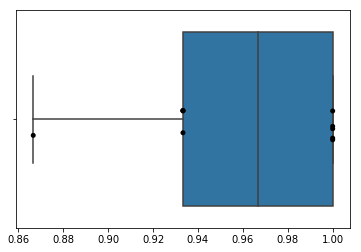

In [176]:
myscores = processData('../data/iris-data-clean.csv')

In [177]:
myscores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

There we have it: We have a complete and reproducible Machine Learning pipeline to demo to our company's Head of Data. We've met the success criteria that we set from the beginning (>90% accuracy), and our pipeline is flexible enough to handle new inputs or flowers when that data set is ready. Not bad for our first week on the job!

## Conclusions

[[ go back to the top ]](#Table-of-contents)

I hope you found this example notebook useful for your own work and learned at least one new trick by reading through it.


* [Submit an issue](https://github.com/ValRCS/LU-pysem/issues) on GitHub

* Fork the [notebook repository](https://github.com/ValRCS/LU-pysem), make the fix/addition yourself, then send over a pull request

## Further reading

[[ go back to the top ]](#Table-of-contents)

This notebook covers a broad variety of topics but skips over many of the specifics. If you're looking to dive deeper into a particular topic, here's some recommended reading.

**Data Science**: William Chen compiled a [list of free books](http://www.wzchen.com/data-science-books/) for newcomers to Data Science, ranging from the basics of R & Python to Machine Learning to interviews and advice from prominent data scientists.

**Machine Learning**: /r/MachineLearning has a useful [Wiki page](https://www.reddit.com/r/MachineLearning/wiki/index) containing links to online courses, books, data sets, etc. for Machine Learning. There's also a [curated list](https://github.com/josephmisiti/awesome-machine-learning) of Machine Learning frameworks, libraries, and software sorted by language.

**Unit testing**: Dive Into Python 3 has a [great walkthrough](http://www.diveintopython3.net/unit-testing.html) of unit testing in Python, how it works, and how it should be used

**pandas** has [several tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) covering its myriad features.

**scikit-learn** has a [bunch of tutorials](http://scikit-learn.org/stable/tutorial/index.html) for those looking to learn Machine Learning in Python. Andreas Mueller's [scikit-learn workshop materials](https://github.com/amueller/scipy_2015_sklearn_tutorial) are top-notch and freely available.

**matplotlib** has many [books, videos, and tutorials](http://matplotlib.org/resources/index.html) to teach plotting in Python.

**Seaborn** has a [basic tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html) covering most of the statistical plotting features.

## Acknowledgements

[[ go back to the top ]](#Table-of-contents)

Many thanks to [Andreas Mueller](http://amueller.github.io/) for some of his [examples](https://github.com/amueller/scipy_2015_sklearn_tutorial) in the Machine Learning section. I drew inspiration from several of his excellent examples.

The photo of a flower with annotations of the petal and sepal was taken by [Eric Guinther](https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg).

The photos of the various *Iris* flower types were taken by [Ken Walker](http://www.signa.org/index.pl?Display+Iris-setosa+2) and [Barry Glick](http://www.signa.org/index.pl?Display+Iris-virginica+3).

## Further questions? 

Feel free to contact [Valdis Saulespurens]
(email:valdis.s.coding@gmail.com)